In [18]:
import networkx as nx
import pandas as pd
import numpy as np
import random
import os
import scipy
import torch

In [19]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#get the data from the drive
id = '1E07PMf68jMo-rULzHfE_q7chqgaYGsXp'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('AIDS700.zip')
!ls

AIDS700nef  AIDS700.zip  __MACOSX  sample_data


In [3]:
!unzip AIDS700.zip

Archive:  AIDS700.zip
   creating: AIDS700nef/
  inflating: __MACOSX/._AIDS700nef   
  inflating: AIDS700nef/.DS_Store    
  inflating: __MACOSX/AIDS700nef/._.DS_Store  
   creating: AIDS700nef/test/
  inflating: __MACOSX/AIDS700nef/._test  
   creating: AIDS700nef/train/
  inflating: __MACOSX/AIDS700nef/._train  
  inflating: AIDS700nef/test/6484.gexf  
  inflating: __MACOSX/AIDS700nef/test/._6484.gexf  
  inflating: AIDS700nef/test/5640.gexf  
  inflating: __MACOSX/AIDS700nef/test/._5640.gexf  
  inflating: AIDS700nef/test/6216.gexf  
  inflating: __MACOSX/AIDS700nef/test/._6216.gexf  
  inflating: AIDS700nef/test/1029.gexf  
  inflating: __MACOSX/AIDS700nef/test/._1029.gexf  
  inflating: AIDS700nef/test/2486.gexf  
  inflating: __MACOSX/AIDS700nef/test/._2486.gexf  
  inflating: AIDS700nef/test/5343.gexf  
  inflating: __MACOSX/AIDS700nef/test/._5343.gexf  
  inflating: AIDS700nef/test/34208.gexf  
  inflating: __MACOSX/AIDS700nef/test/._34208.gexf  
  inflating: AIDS700nef/test/11

In [4]:
dirName = 'AIDS700nef/train/'
filenames = os.listdir(dirName)
Node_Types = []
Edge_Types = []
for filename in filenames:
    if filename.endswith(".gexf"):
        #print(filename)
        temp =  nx.read_gexf(path=dirName+"/"+filename)
        for node in temp.nodes:
            temp_type = temp.nodes[node]['type']
            if temp_type not in Node_Types:
                Node_Types.append(temp_type)
        for edge in temp.edges:
            temp_type = temp.edges[edge]['valence']
            if temp_type not in Edge_Types:
                Edge_Types.append(temp_type)

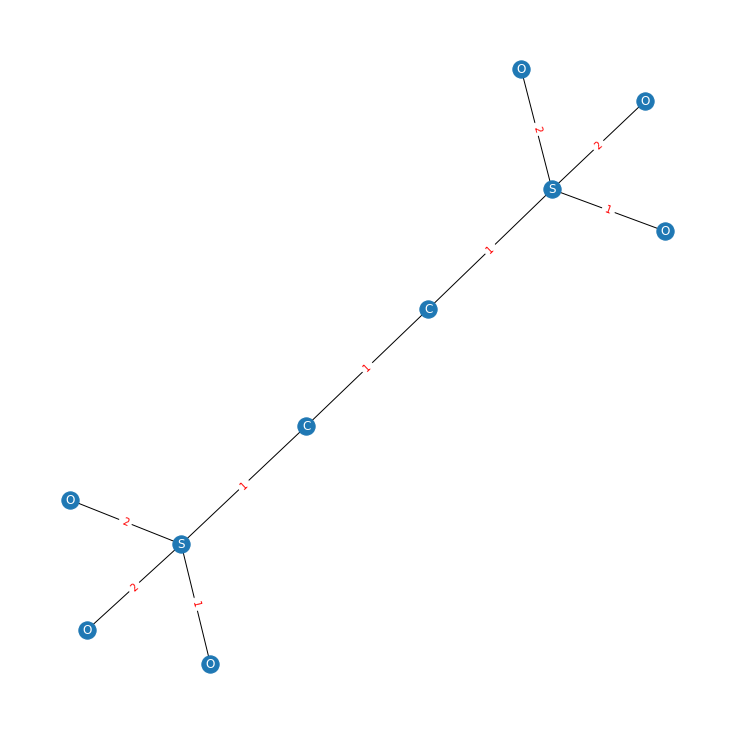

Node Info:  {'7': 'O', '3': 'S', '5': 'O', '8': 'O', '6': 'O', '1': 'C', '9': 'O', '0': 'C', '4': 'O', '2': 'S'}
Edge Info:  {('7', '3'): 2, ('3', '1'): 1, ('3', '8'): 2, ('3', '9'): 1, ('5', '2'): 2, ('6', '2'): 1, ('1', '0'): 1, ('0', '2'): 1, ('4', '2'): 2}
7  :  {'3': {'valence': 2, 'id': '6'}}
3  :  {'7': {'valence': 2, 'id': '6'}, '1': {'valence': 1, 'id': '2'}, '8': {'valence': 2, 'id': '7'}, '9': {'valence': 1, 'id': '8'}}
5  :  {'2': {'valence': 2, 'id': '4'}}
8  :  {'3': {'valence': 2, 'id': '7'}}
6  :  {'2': {'valence': 1, 'id': '5'}}
1  :  {'3': {'valence': 1, 'id': '2'}, '0': {'valence': 1, 'id': '0'}}
9  :  {'3': {'valence': 1, 'id': '8'}}
0  :  {'1': {'valence': 1, 'id': '0'}, '2': {'valence': 1, 'id': '1'}}
4  :  {'2': {'valence': 2, 'id': '3'}}
2  :  {'5': {'valence': 2, 'id': '4'}, '6': {'valence': 1, 'id': '5'}, '0': {'valence': 1, 'id': '1'}, '4': {'valence': 2, 'id': '3'}}


In [5]:
import matplotlib.pyplot as plt

#read the 1011.gexf
Graph = nx.read_gexf('AIDS700nef/train/4.gexf',version='1.2draft')

node_info = nx.get_node_attributes(Graph, 'type')
edge_info = dict([((n1, n2), d['valence']) for n1, n2, d in Graph.edges(data=True)])

#graph display
pos = nx.spring_layout(Graph, scale=1.5)  
plt.figure(1,figsize=(10,10)) 
nx.draw(Graph, pos, labels=node_info, font_color="white")
nx.draw_networkx_edge_labels(Graph, pos, edge_labels=edge_info, font_color="red")
plt.show()

#info display
print("Node Info: ",node_info)
print("Edge Info: ",edge_info)
# numpy_graph = nx.to_numpy_array(Graph, nodelist = node_info)
# print(numpy_graph)
# adjacency representation of graph as a dictionary of dictionaries
adj_graph = nx.to_dict_of_dicts(Graph)
for key, value in adj_graph.items():
    print(key, ' : ', value)

['7', '3', '5', '8', '6', '1', '9', '0', '4', '2']
Node info:  {'7': 'O', '3': 'S', '5': 'O', '8': 'O', '6': 'O', '1': 'C', '9': 'O', '0': 'C', '4': 'O', '2': 'S'}
Edge info:  {('7', '3'): 2, ('3', '1'): 1, ('3', '8'): 2, ('3', '9'): 1, ('5', '2'): 2, ('6', '2'): 1, ('1', '0'): 1, ('0', '2'): 1, ('4', '2'): 2}
The GEV:  [2, 2, 1, 3, 4, 3, 4, 3, 2]
Adding a new node ID: 10 and Type: As
Adding a new node ID: 11 and Type: Bi
Select Node 6 and its label O to relabel with Cu
Select Edge(3, 1) and its label 1 to relabel with 3
Edge between label 3 and label 8 is removed
[('3', '8')]
Select Node 6 and Node 1 for new Edge
Select Edge(6, 2) and its label 1 to relabel with 2
Edge between label 7 and label 3 is removed
[('3', '8'), ('7', '3')]
Select Node 3 and Node 7 for new Edge
Select Edge(4, 2) and its label 2 to relabel with 3
Adding a new node ID: 12 and Type: Pd
Graph display after the transformation:
Transformed Node info:  {'7': 'O', '3': 'S', '5': 'O', '8': 'O', '6': 'Cu', '1': 'C', '9'

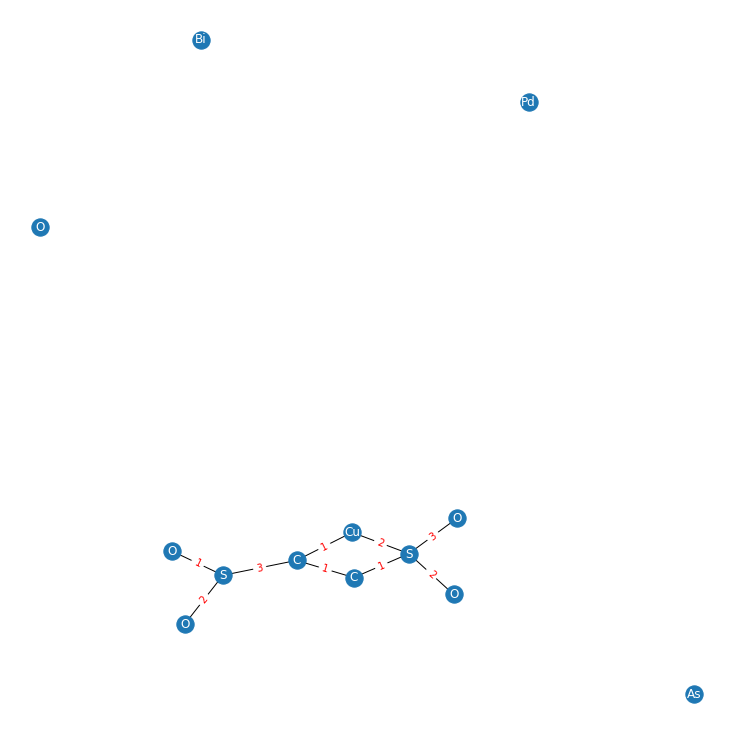

7  :  {'3': {'valence': 2, 'id': '9'}}
3  :  {'1': {'valence': 3, 'id': '2'}, '9': {'valence': 1, 'id': '8'}, '7': {'valence': 2, 'id': '9'}}
5  :  {'2': {'valence': 2, 'id': '4'}}
8  :  {}
6  :  {'2': {'valence': 2, 'id': '5'}, '1': {'valence': 1, 'id': '9'}}
1  :  {'3': {'valence': 3, 'id': '2'}, '0': {'valence': 1, 'id': '0'}, '6': {'valence': 1, 'id': '9'}}
9  :  {'3': {'valence': 1, 'id': '8'}}
0  :  {'1': {'valence': 1, 'id': '0'}, '2': {'valence': 1, 'id': '1'}}
4  :  {'2': {'valence': 3, 'id': '3'}}
2  :  {'5': {'valence': 2, 'id': '4'}, '6': {'valence': 2, 'id': '5'}, '0': {'valence': 1, 'id': '1'}, '4': {'valence': 3, 'id': '3'}}
10  :  {}
11  :  {}
12  :  {}


In [6]:
def graph_pair_generator(graph, ground_GEV):
  target_graph = graph
  node_id = list(target_graph.nodes)
  edge_id = list(target_graph.edges)
  print(node_id)

  node_info = nx.get_node_attributes(target_graph, 'type')
  edge_info = dict([((n1, n2), d['valence']) for n1, n2, d in target_graph.edges(data=True)])

  print("Node info: ", node_info)
  print("Edge info: ", edge_info)
  print("The GEV: ",ground_GEV)
  
  #index of the ground GEV in for loop
  gev_index = 0
  #make sure not to relabel the relabeled node
  relabel_node = []
  #make sure not to relabel the relabeled edge
  relabel_edge = []
  #store the delete edge
  delete_edge = []
  #for fixing the GEV if all nodes or edges are relabeled
  relabel_fix_gev = []

  for edit_type in ground_GEV:
    # print("Relabeled node: ",relabel_node)
    
    node_id = list(target_graph.nodes)
    edge_id = list(target_graph.edges)

    node_info = nx.get_node_attributes(target_graph, 'type')
    edge_info = dict([((n1, n2), d['valence']) for n1, n2, d in target_graph.edges(data=True)])

    if edit_type == 1: #Node Relabeling
      if len(relabel_node) == len(node_id):#when all the nodes are relabeled
        #add another edit operation or remove the edit operation
        new_operation_type = random.choice([2,3,4])
        ground_GEV.append(new_operation_type)
        print("Add new operation type: ",new_operation_type)
        relabel_fix_gev.append(gev_index)
        gev_index += 1
        pass
      else:
        #not choosing the relabed nodes
        random_node = random.choice(node_id)
        while random_node in relabel_node:
          node_id.remove(random_node)
          random_node = random.choice(node_id)
        relabel_node.append(str(random_node))
        # update with the selected node and make sure not the same type
        remove_self_type = node_info[str(random_node)]
        Node_Types.remove(remove_self_type)
        new_node_attr = random.choice(Node_Types)
        Node_Types.append(remove_self_type)
        print("Select Node "+random_node+" and its label "+remove_self_type+" to relabel with "+new_node_attr)
        nx.set_node_attributes(target_graph, {str(random_node): {'type': new_node_attr, 'label': str(random_node)}})
        gev_index += 1

    elif edit_type == 2: #Node Insertion
      new_node_type = random.choice(Node_Types)
      new_node_id = str(len(node_id)) #increametal 1 from original ID list
      print("Adding a new node ID: "+new_node_id+" and Type: "+ new_node_type)
      target_graph.add_node(new_node_id, type = new_node_type, label = new_node_id)
      # nx.set_node_attributes(target_graph, {new_node_id: {'type': new_node_type, 'label': new_node_id}})
      gev_index += 1

    elif edit_type == 3: #Edege Relabeling
      if len(relabel_edge) == len(edge_id):#when all the edges are relabeled
        #add another edit operation or remove the edit operation
        new_operation_type = random.choice([1,2,4])
        ground_GEV.append(new_operation_type)
        print("Add new operation type: ",new_operation_type)
        relabel_fix_gev.append(gev_index)
        gev_index += 1
        pass
      else:
        #not choosing the relabed nodes
        random_edge = random.choice(edge_id)
        while random_edge in relabel_edge:
          edge_id.remove(random_edge)
          random_edge = random.choice(edge_id)
        relabel_edge.append(random_edge)
        # update with the selected edge and make sure not the same type
        remove_self_type = edge_info[random_edge]
        Edge_Types.remove(remove_self_type)
        new_edge_attr = random.choice(Edge_Types)
        Edge_Types.append(remove_self_type)
        selected_edge_id = target_graph.edges[random_edge]['id']
        print("Select Edge("+random_edge[0]+", "+random_edge[1]
              +") and its label "+str(remove_self_type)+" to relabel with "+str(new_edge_attr))
        nx.set_edge_attributes(target_graph, {random_edge: {'valence': new_edge_attr, 'id': selected_edge_id}})
        gev_index += 1

    elif edit_type == 4: #Edge Deletion / Insertion
      #Edge Deletion
      random_edge = random.choice(edge_id)
      delete_edge.append(random_edge) #store the delete edge
      target_graph.remove_edge(random_edge[0], random_edge[1])
      print("Edge between label "+random_edge[0]+" and label "+random_edge[1]+" is removed")
      print(delete_edge)

      #Edge Insertion
      #inserting new edge can be happend between existing & existing or existing & new node
      ram_node1 = str(random.choice(node_id))
      ram_node2 = str(random.choice(node_id))
      print("Select Node "+ram_node1+" and Node "+ ram_node2+" for new Edge")
      #making sure two nodes does not have existing connection and not existing in delete edge list
      while (ram_node1,ram_node2) in edge_info or (ram_node1,ram_node2) in delete_edge:
        print("Connecting exist or it is remove edge before, picking a new set!")
        ram_node1 = random.choice(node_id)
        ram_node2 = random.choice(node_id)
        print("Select Node "+ram_node1+" and Node "+ ram_node2+" for new Edge")
      target_graph.add_edge(ram_node1, ram_node2)
      #assigned edge label
      new_edge_type = random.choice(Edge_Types)
      new_edge_id = str(len(edge_id))
      edge_label = {'valence': new_edge_type, 'id':new_edge_id}
      nx.set_edge_attributes(target_graph, {(ram_node1, ram_node2) : edge_label})
      gev_index += 1

  #fixing gev from over relabel after all nodes or edges are relabeled
  counter_node = 1
  for x in relabel_fix_gev:
    del ground_GEV[x-counter_node]
    counter_node += 1
    print("Delete :",x)
    print(ground_GEV)

  print("Graph display after the transformation:")
  node_info = nx.get_node_attributes(target_graph, 'type')
  edge_info = dict([((n1, n2), d['valence']) for n1, n2, d in target_graph.edges(data=True)])
  print("Transformed Node info: ", node_info)
  print("Transformed Edge info: ", edge_info)
  print("Transformed GEV: ", ground_GEV)
  pos = nx.spring_layout(target_graph, scale=1.5)  
  plt.figure(1,figsize=(10,10)) 
  nx.draw(target_graph, pos, labels=node_info, font_color="white")
  nx.draw_networkx_edge_labels(target_graph, pos, edge_labels=edge_info, font_color="red")
  plt.show()

  return graph, target_graph, ground_GEV

#randomly form the gev
#first ram the number of edit operation between 5 to 10
num_operation = random.choice(range(5,11))
GEV = []
for i in range(num_operation):
  #ram the opreation type NR:1, NID:2, ER:3, EID:4
  GEV.append(random.choice(range(1,5)))

# call the graph_pair_generator function with testing graph 4.gexf
# [3,3,3,3,3,3,3,3,3 ,1,1,1,1,1,1,1,1,1,1 ,3,3,1,1,2]
graph, target_graph, GEV =graph_pair_generator(Graph, GEV)
# adjacency representation of graph as a dictionary of dictionaries
adj_graph = nx.to_dict_of_dicts(target_graph)
for key, value in adj_graph.items():
    print(key, ' : ', value)

In [7]:
#AIDS700nef contains 700 graph
#using the Generator to replicate the dataset with result of 1400 graph
#1120 for training, 280 for testing
dirName_train = 'AIDS700nef/train/'
filenames = os.listdir(dirName_train)
count = 0
for filename in filenames:
    if filename.endswith(".gexf"):
      count += 1
print(count)
dirName_test = 'AIDS700nef/test/'
filenames = os.listdir(dirName_test)
count = 0
for filename in filenames:
    if filename.endswith(".gexf"):
      count += 1
print(count)

560
140


In [31]:
def transfer_to_torch(graph1,graph2):
  new_data = dict()
  NLM0_graph1,NLM0_graph2,ELM0_graph1,ELM0_graph2,eadj_graph1,eadj_graph2=[],[],[],[],[],[]
  for n in graph1.nodes():
    NLM0_graph1.append([1.0 if graph1.nodes()[n]['type'] == ele else 0.0 for ele in Node_Types])
  for n in graph2.nodes():
    NLM0_graph2.append([1.0 if graph2.nodes()[n]['type'] == ele else 0.0 for ele in Node_Types])
  for e in graph1.edges():
    ELM0_graph1.append([1.0 if graph1.edges()[e]['valence'] == ele else 0.0 for ele in Edge_Types])
    for d in graph1.edges():
      if (e==d):
        eadj_graph1.append(0)
        continue
      if ((e[0] in d) | (e[1] in d)):
        eadj_graph1.append(1)
  for e in graph2.edges():
    ELM0_graph2.append([1.0 if graph2.edges()[e]['valence'] == ele else 0.0 for ele in Edge_Types])
    for d in graph2.edges():
      if (e==d):
        eadj_graph2.append(0)
        continue
      if ((e[0] in d) | (e[1] in d)):
        eadj_graph2.append(1)
  NLM0_graph1, NLM0_graph2 = torch.FloatTensor(np.array(NLM0_graph1)), torch.FloatTensor(np.array(NLM0_graph2))
  ELM0_graph1, ELM0_graph2 = torch.FloatTensor(np.array(ELM0_graph1)), torch.FloatTensor(np.array(ELM0_graph2))
  eadj_graph1, eadj_graph2 = torch.FloatTensor(np.array(eadj_graph1)), torch.FloatTensor(np.array(eadj_graph2))
  nadj_graph1, nadj_graph2 = torch.FloatTensor(np.array(nx.adjacency_matrix(graph1).todense())), torch.FloatTensor(np.array(nx.adjacency_matrix(graph2).todense()))
  new_data["NLM0_graph1"], new_data["NLM0_graph2"] = NLM0_graph1, NLM0_graph2
  new_data["ELM0_graph1"], new_data["ELM0_graph2"] = ELM0_graph1, ELM0_graph2
  new_data["eadj_graph1"], new_data["eadj_graph2"] = eadj_graph1, eadj_graph2
  new_data["nadj_graph1"], new_data["nadj_graph2"] = nadj_graph1, nadj_graph2
  return(new_data)

  
  
  



In [32]:
def gal_layer(adj,label):
  hidden1 = torch.mm(adj,label)
  hidden2 = torch.mm(adj,hidden1)
  return hidden1, hidden2



In [33]:
def forward(new_data):
  ELM0_graph1, ELM0_graph2 = new_data["ELM0_graph1"], new_data["ELM0_graph2"]
  eadj_graph1, eadj_graph2 = new_data["eadj_graph1"], new_data["eadj_graph2"] 
  NLM0_graph1, NLM0_graph2 = new_data["NLM0_graph1"], new_data["NLM0_graph2"]
  nadj_graph1, nadj_graph2 = new_data["nadj_graph1"], new_data["nadj_graph2"]
  
  graph1_hidden1, graph1_hidden2 = gal_layer(nadj_graph1, NLM0_graph1)
  graph2_hidden1, graph2_hidden2 = gal_layer(nadj_graph2, NLM0_graph2)
  edge1_hidden1, edge1_hidden2 = gal_layer(eadj_graph1, ELM0_graph1)
  edge2_hidden1, edge2_hidden2 = gal_layer(eadj_graph2, ELM0_graph2)
  
  graph1_01concat = torch.cat([NLM0_graph1, graph1_hidden1], dim=1)
  graph2_01concat = torch.cat([NLM0_graph2, graph2_hidden1], dim=1)
  graph1_12concat = torch.cat([graph1_hidden1, graph1_hidden2], dim=1)
  graph2_12concat = torch.cat([graph2_hidden1, graph2_hidden2], dim=1)
  
  graph1_01pooled = torch.sum(graph1_01concat, dim=0).unsqueeze(1)
  graph2_01pooled = torch.sum(graph2_01concat, dim=0).unsqueeze(1)
  graph1_12pooled = torch.sum(graph1_12concat, dim=0).unsqueeze(1)
  graph2_12pooled = torch.sum(graph2_12concat, dim=0).unsqueeze(1)
  
  edge1_01concat = torch.cat([ELM0_graph1, edge1_hidden1], dim=1)
  edge2_01concat = torch.cat([ELM0_graph2, edge2_hidden1], dim=1)
  
  edge1_01pooled = torch.sum(edge1_01concat, dim=0).unsqueeze(1)
  edge2_01pooled = torch.sum(edge2_01concat, dim=0).unsqueeze(1)
  
  print(graph1_01pooled)
  print(graph2_01pooled)
  print(graph1_12pooled)
  print(graph2_12pooled)
  print(edge1_01pooled)
  print(edge2_01pooled)